 <h align=centre><font size = 8, style="color:rgb(200,0,0)">Atividade: Regressão Linear</font></h>

**Importanto a biblioteca a ser utilizada**

In [30]:
import pandas as pd
import numpy as np

# QUESTÃO 01

Na	 engenharia de	 recursos	 hídricos	 a	 estimativa dos	 tamanhos	 dos reservatórios	 depende	 de	estimativas	acuradas	 do	escoamento	 da	água	 do	 rio	 que	está sendo	confinado.	Em	alguns	rios,	registros	históricos	de	longa	duração	de	 tais	dados	de	escoamento	 são	 difíceis	 de	 obter.	 Já	 os	 dados	 meteorológicos	 sobre precipitação	 estão	disponíveis	 para	 muitos	 anos	 do	 passado.	 Portanto,	 é	 útil	 determinar	 a	 relação	 entre	escoamento	e	precipitação.	<br>
Essa	 relação	 pode	 ser	 usada	 para	 fazer	 uma	 estimativa	 do	 escoamento	 nos	anos	nos	quais	apenas	medidas	de	precipitação	foram	feitos.	Os	seguintes	dados	estão	disponíveis	para	um	rio	que	deve	ser	estancado:

Precipitação [cm/ano] e Escoamento [m3/s]


a) Calcula através do método de regressão linear a função que melhor ajusta aos dados <br>
b) Determine o coeficiente de correlação dos dados. <br>
c) Utilize a função da reta para prever o escoamento se a precipitação for de (cm)
- 55.5
- 66.4
- 22.1
- 1
<br>
d) Faça	uma	estimativa	de	escoamento	para	140 cm/ano

## Base de Dados

In [31]:
v1 = [88.9, 108.5, 104.1, 139.7, 127]
v2 = [14.6, 16.7, 15.3, 23.2, 19.5]
dados = {'Precipitação': v1, 'Escoamento': v2}
df = pd.DataFrame(dados)
df

,Precipitação,Escoamento
0,88.9,14.6
1,108.5,16.7
2,104.1,15.3
3,139.7,23.2
4,127.0,19.5


## Pré-Analise dos dados

In [32]:
df.head

<bound method NDFrame.head of    Precipitação  Escoamento
0          88.9        14.6
1         108.5        16.7
2         104.1        15.3
3         139.7        23.2
4         127.0        19.5>

## Seleção das variveis

In [33]:
y = df['Escoamento'].values
x = df['Precipitação'].values

## Divisão - Treino e Teste

In [34]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

## Seleção do modelo --> Regressão Linear

In [35]:
from sklearn.linear_model import LinearRegression

model  = LinearRegression()
x_train = x_train.reshape(-1,1)

## Treinamento do modelo

In [36]:
model.fit(x_train,y_train)

LinearRegression()

## Metricas do modelo

In [37]:
coef_angular = model.coef_[0]
print("Coefciente angular : {:0.2f}".format(coef_angular))
coef_linear = model.intercept_
print("Coefciente linear : {:0.2f}".format(coef_linear))

Coefciente angular : 0.18
Coefciente linear : -2.11


## Previsão dos novos dados

In [38]:
x_test = x_test.reshape(-1,1)
model.predict(x_test)

array([17.27121676, 20.57642092])

# QUESTÃO 02

 É esperado que a massa muscular de uma pessoa diminua com a idade. Para estudar essa relação, uma nutricionista selecionou 18 mulheres, com idade entre 40 e 79 anos, e observou em cada uma delas a idade (X) e a massa muscular (Y).

- a. Construa o diagrama de dispersão e interprete-o.

- b. Calcule o coeficiente de correlação linear entre X e Y.

- c. Ajuste uma reta de regressão para a relação entre as variáveis Y: massa muscular (dependente) e X: idade (independente).

- d. Considerando a reta estimada dada no item (c), estime a massa muscular média de mulheres com 50 anos.

In [39]:
# Dados de fornecidos e formatando para formato adequado.

X = np.array([71,64,43,67,56,73,68,56,76,65,45,58,45,53,49,78,73,68]).reshape(-1,1)
Y = np.array([82,91,100,68,87,73,78,80,65,84,116, 76,97,100,105,77, 73,78])

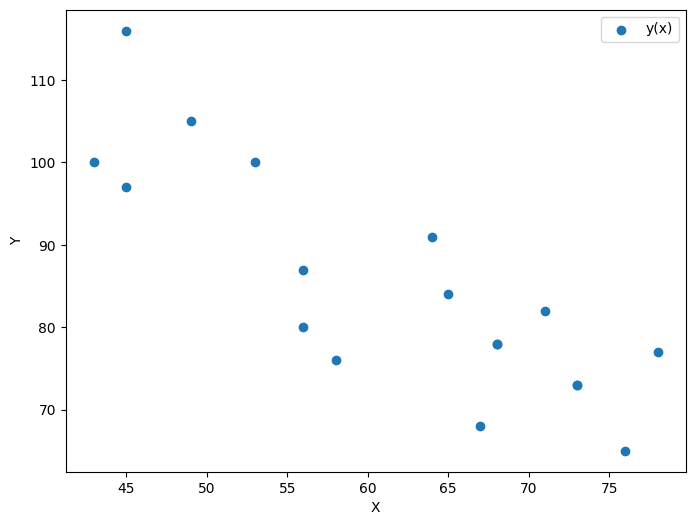

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(X,Y,label=('y(x)'))
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

In [42]:
correlation = np.corrcoef(X.flatten(),Y)[0,1]
print(f"correlação : {correlation:.2f}")

correlação : -0.84


Text(0, 0.5, 'Y')

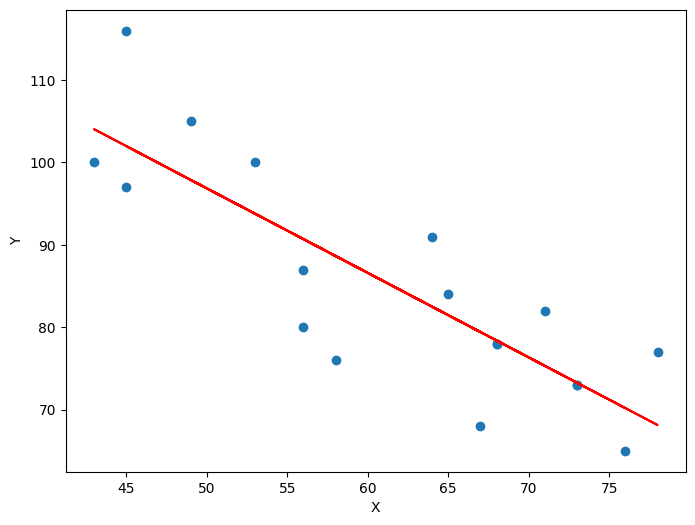

In [43]:
model2 = LinearRegression()
model2.fit(X,Y)
y_vals = model2.predict(X)

plt.figure(figsize=(8,6))
plt.scatter(X,Y)
plt.plot(X,y_vals,color='red')
plt.xlabel('X')
plt.ylabel('Y')


In [ ]:
a = model2.predict(np.array([50]).reshape(-1,1))
print("Possivel massa muscular de uma mulher de 50 anos:",a)

possivel massa muscular de uma mulher de 50 anos: [96.86368784]


# QUESTÃO 03

Os dados abaixo correspondem às variáveis renda familiar e gasto com alimentação numa amostra de dez famílias, representadas em salários mínimos.

(a)
Qual a previsão do gasto com alimentação para uma família com renda de 170 reais?

(b)
Qual a previsão do gasto para famílias com excepcional renda, por exemplo 1.000 reais? Você acha esse valor razoável? Por quê?


In [ ]:
# Dados de fornecidos e formatando para formato adequado.

Renda = np.array([3,5,10,20,30,50,70,100,150,200]).reshape(-1, 1)# feature
Gasto = np.array([1.5,2.0,6.0,10.0,15.0,20.0,25.0,40.0,60.0,80.0]).reshape(-1, 1) #variavel alvo

model3 = LinearRegression()
model3.fit(Renda,Gasto)

b = model3.predict(np.array([1000]).reshape(-1,1)) #renda de mil reais
c = model3.predict(np.array([170]).reshape(-1,1)) # renda de 170
d = model3.predict(np.array([190]).reshape(-1,1)) # renda de 170

print('Renda = 170 :',c)
print('Renda = 1000 :',b)
print(d)

Renda = 170 : [[67.55843523]]
Renda = 1000 : [[392.74677083]]
[[75.39429874]]


b) ate que é razoavel apesar de não fazer muito sentido , afinal 1000 é um outlier 